# W11 - Class Assignment
# Data Mining (Kamis)
W11 - 0706022310028 - Jevon Ivander K

In [47]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator

# 1. Perform data preprocessing

In [48]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [49]:
df.shape

(225, 10)

The data consists of 225 rows and 10 columns

In [50]:
# describe data
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


The `df.describe()` output provides a summary of the central tendency, dispersion, and shape of the distribution of each numerical column in your dataset. Let's break down the key insights:

*   **`count`**: This row shows that all numerical columns have 225 non-null entries, indicating no missing values in these columns.

*   **`mean`**: This represents the average value for each column.
    *   For `Population`, the average is approximately 35 million, but with a very high standard deviation, suggesting a wide range of population sizes.
    *   `Total Cases` average is around 2.18 million, while `Total Deaths` average is about 27,448.
    *   `Tot Cases/1M pop` and `Tot Deaths/1M pop` are normalized by population, making them useful for comparison across countries, with averages of 136,900 and 1096 per million people, respectively.
    *   The `Death percentage` averages around 1.44%, indicating the average case fatality rate.

*   **`std` (Standard Deviation)**: This measures the amount of variation or dispersion of a set of values.
    *   Columns like `Population`, `Total Cases`, and `Total Deaths` have very high standard deviations, much larger than their means. This suggests a significant skew in the data, likely due to a few very large countries dominating the counts.
    *   `Tot Cases/1M pop` and `Tot Deaths/1M pop` also show considerable standard deviations, implying a wide disparity in per-capita COVID-19 impact across countries.

*   **`min`**: The minimum value found in each column.
    *   `Population` minimum is 805, suggesting very small territories are included.
    *   `Total Cases` has a minimum of 1, and `Total Deaths` has a minimum of 0. This could indicate regions with very few or no reported cases/deaths.

*   **`25%` (1st Quartile)**: 25% of the data falls below this value.

*   **`50%` (Median)**: The middle value of the dataset. For many columns, the median is significantly lower than the mean, further supporting the idea of right-skewed distributions (e.g., the median `Total Cases` is 163,936, much lower than the mean of 2.18 million).

*   **`75%` (3rd Quartile)**: 75% of the data falls below this value.

*   **`max`**: The maximum value in each column.
    *   The maximum `Population` is 1.4 billion, likely China or India.
    *   The maximum `Total Cases` is over 81 million and `Total Deaths` is over 1 million, indicating countries severely hit by the pandemic.
    *   The `Death percentage` goes up to 18.15%, highlighting regions with very high case fatality rates.

In [51]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


The `df.info()` method provides a summary of the DataFrame's structure, including the number of entries, the total number of columns, the data type of each column, and the count of non-null values per column.

*   **`RangeIndex: 225 entries, 0 to 224`**: This indicates that the DataFrame contains 225 rows, indexed from 0 to 224.

*   **`Data columns (total 10 columns)`**: There are a total of 10 columns in the DataFrame.

*   **Column Information (`#`, `Column`, `Non-Null Count`, `Dtype`):
    *   Most columns (`Country`, `ISO 3166-1 alpha-3 CODE`, `Population`, `Continent`, `Total Cases`, `Total Deaths`, `Tot Cases//1M pop`, `Tot Deaths/1M pop`, `Death percentage`) have `225 non-null` entries, matching the total number of rows. This means these columns are complete and have no missing values.
    *   However, the **`Other names`** column has `224 non-null` entries, which is one less than the total `225` rows. This indicates that there is **1 missing (null) value** in the `Other names` column.

*   **`dtypes: float64(1), int64(5), object(4)`**: This shows the data types present in the DataFrame: one column is of float type, five are integers, and four are object (typically strings).

In [52]:
df = df.drop(columns=['Other names'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 2   Population               225 non-null    int64  
 3   Continent                225 non-null    object 
 4   Total Cases              225 non-null    int64  
 5   Total Deaths             225 non-null    int64  
 6   Tot Cases//1M pop        225 non-null    int64  
 7   Tot Deaths/1M pop        225 non-null    int64  
 8   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 15.9+ KB


Based on the previous `df.info()` output, the 'Other names' column contained one missing value and might not be directly relevant for numerical clustering. I will now drop this column to clean the dataset. Beside that, it also contains the same information as Country so it will be not used

Now there is no null value but we must check its unique values to find if there is unknown values or no

In [53]:
# Display unique values for each column
for col in df.columns:
    print(f"Column: {col}")
    if df[col].dtype == 'object':
        print(df[col].value_counts())
    else:
        print(df[col].unique())
    print("-" * 30)

Column: Country
Country
Afghanistan          1
Albania              1
Algeria              1
Andorra              1
Angola               1
                    ..
Wallis and Futuna    1
Western Sahara       1
Yemen                1
Zambia               1
Zimbabwe             1
Name: count, Length: 225, dtype: int64
------------------------------
Column: ISO 3166-1 alpha-3 CODE
ISO 3166-1 alpha-3 CODE
AFG      1
ALB      1
DZA      1
AND      1
AGO      1
        ..
WLF      1
ESHÂ     1
YEM      1
ZMB      1
ZWE      1
Name: count, Length: 225, dtype: int64
------------------------------
Column: Population
[  40462186    2872296   45236699      77481   34654212      15237
      99348   45921761    2972939     107560   26017767    9096360
   10299156     399822    1804995  167561502     287991    9443882
   11677924     410260   12678649      61875     786480   11951714
    3245097    2434708  215204501      30583     444812    6856886
   21905848   12510155     566557   17123941   27701

okay so it's safe

# 2. Conduct Exploratory Data Analysis (EDA)

- At least 2 meaningful visualizations, including world map visualization by continent. You can use choropleth in plotly.express so the result will be like the picture below

- Each visualization must include a written explanation (2-3 sentences) describing
what the chart reveals

In [54]:
import plotly.express as px

fig = px. choropleth(
  df,
  locations="ISO 3166-1 alpha-3 CODE",
  color="Continent", # Color by Continent for better readability hover_name="Country"
  projection="natural earth",
  title="World Map of Countries by Continent"
)
fig. show()

The choropleth map visually represents the geographical distribution of the countries in our dataset across the world. Each country is shaded according to its assigned continent, providing a clear overview of the continental boundaries and the relative number of countries per continent included in the data. This visualization helps to immediately grasp the global coverage of the dataset and identify which regions are densely or sparsely represented.

- Asia = Blue (specifically, a lighter shade of blue/lavender)
- Europe = Light Pink/Coral
- Africa = Green
- Latin America and the Caribbean = Purple

- Oceania = Orange
- Northern America = Cyan/Turquoise

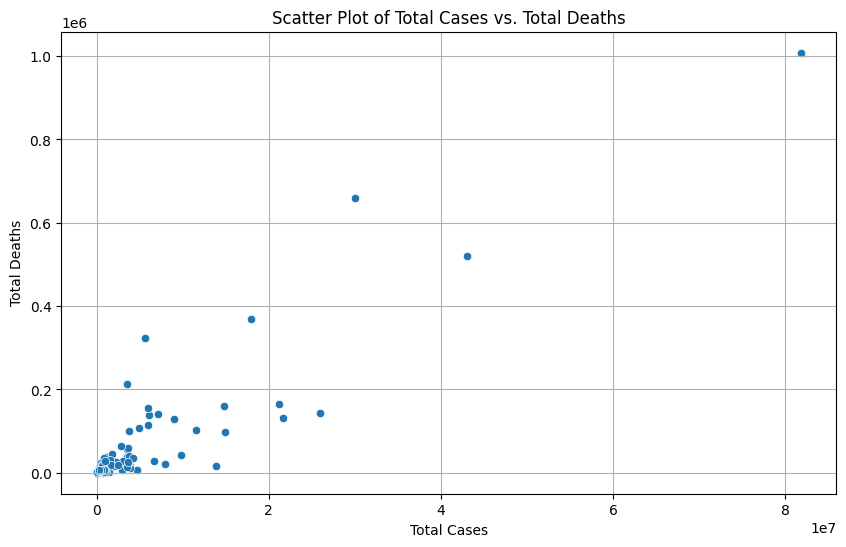

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Cases', y='Total Deaths')
plt.title('Scatter Plot of Total Cases vs. Total Deaths')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()

The scatter plot visualizes the relationship between **Total Cases** and **Total Deaths**, primarily revealing a **strong positive correlation** between the two variables: as the number of total cases increases, the number of total deaths generally increases as well. However, the distribution is highly uneven. The majority of data points are clustered near the origin (low cases and low deaths), but there is a clear distinction with **outliers** indicating countries or regions with significantly higher numbers. Most notably, one distinct outlier is visible far to the upper right, representing a single entity with an extremely high number of both total cases (approaching $8 \times 10^7$) and total deaths (exceeding $1 \times 10^6$), suggesting it was disproportionately affected compared to the rest of the data. This pattern highlights a few areas of severe impact amidst a larger group with a much smaller burden.

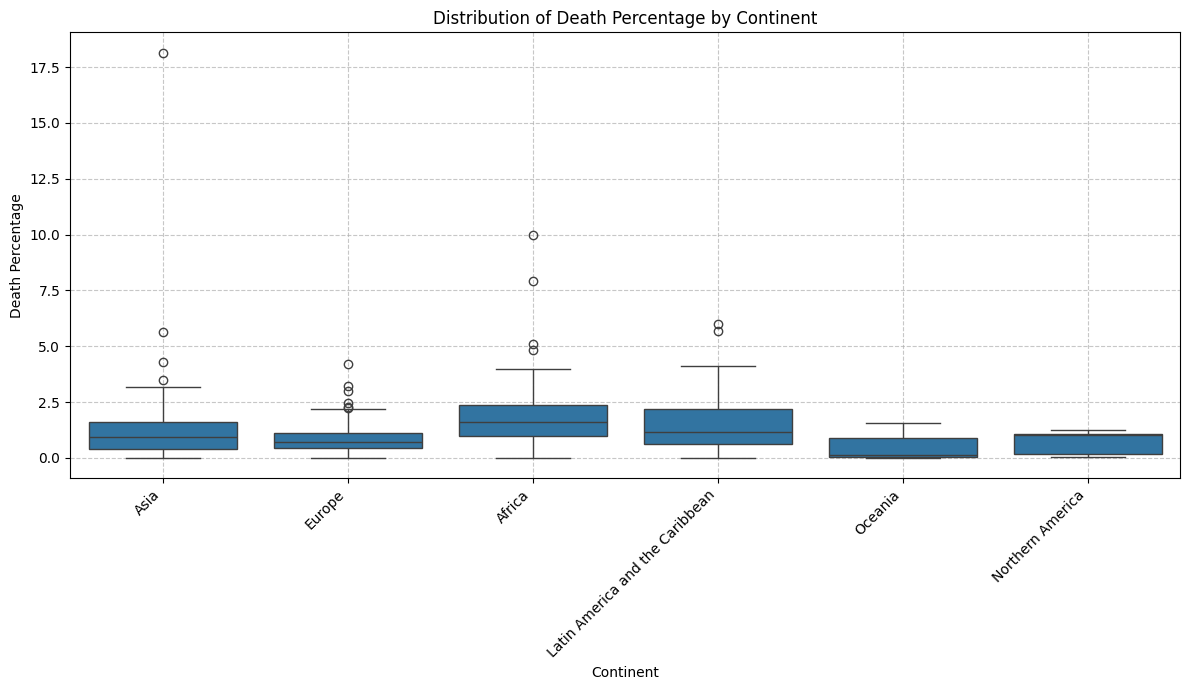

In [56]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Continent', y='Death percentage')
plt.title('Distribution of Death Percentage by Continent')
plt.xlabel('Continent')
plt.ylabel('Death Percentage')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The box plot visualizes the **distribution of the Death Percentage across different continents**, revealing variations in the central tendency, spread, and presence of outliers for each region.

Key Insights from the Visualization

* **Central Tendency (Median):** The median Death Percentage (the line inside the box) is generally **low (below 2.0%)** for all continents. **Africa** and **Latin America and the Caribbean** show slightly higher medians compared to the other continents, though they remain relatively low. **Oceania** and **Northern America** have the lowest medians.
* **Spread (Interquartile Range - IQR):** **Africa** and **Latin America and the Caribbean** have the largest boxes, indicating a **wider spread** or greater variability in Death Percentages among the countries within those continents (higher IQR). **Oceania** and **Northern America** show the narrowest spread, suggesting more consistent death percentages across their respective countries.
* **Outliers:** All continents except Oceania and Northern America exhibit **significant outliers** (the individual circles above the whiskers). These outliers represent countries with Death Percentages substantially higher than the vast majority of countries in their respective continents. The highest outlier, exceeding 17.5%, belongs to **Asia**, while Africa also shows an outlier approaching 10%.
* **Conclusion:** While the **typical** Death Percentage is low globally, **Africa** and **Latin America and the Caribbean** show both a slightly higher median and a greater range of death percentages. The presence of high outliers in **Asia, Europe, Africa, and Latin America** indicates that a few countries in these regions were disproportionately affected, driving the maximum observed death percentages much higher than the norm.

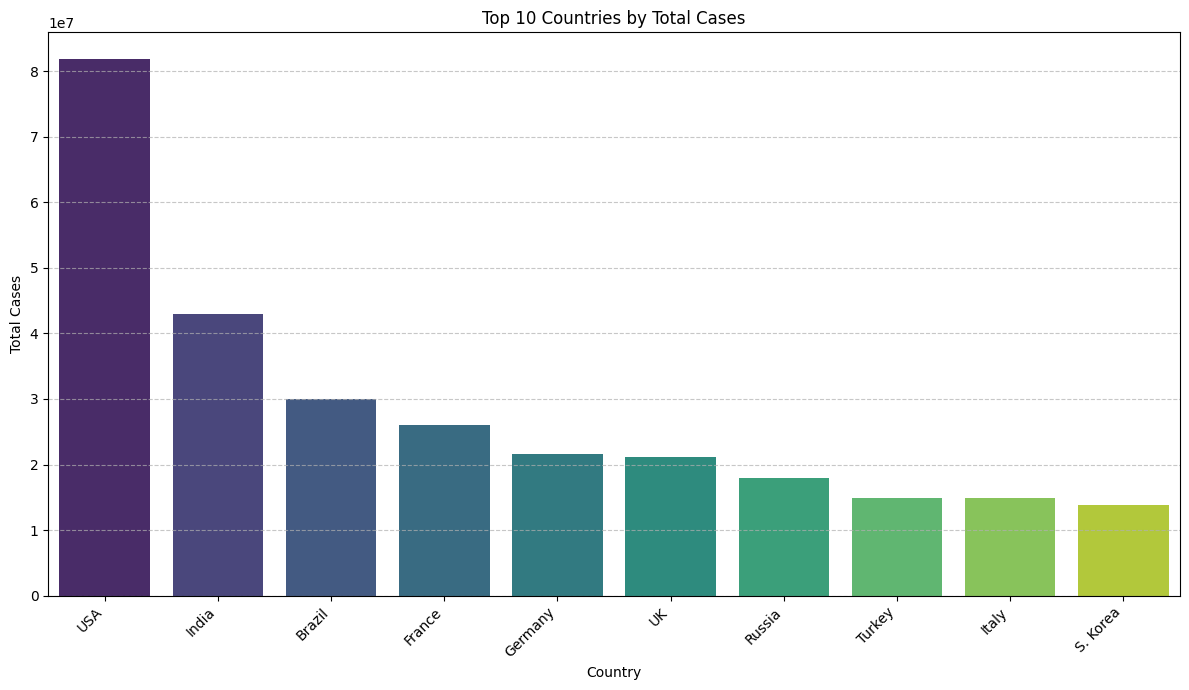

In [57]:
top_10_cases = df.sort_values(by='Total Cases', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_cases, x='Country', y='Total Cases', hue='Country', palette='viridis', legend=False)
plt.title('Top 10 Countries by Total Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar chart clearly displays the **Top 10 Countries by Total Cases**, highlighting a stark disparity in case numbers among the most affected nations.

Key Insights from the Visualization

* **Dominance of the USA:** The **USA** stands out significantly, reporting **over $80$ million Total Cases**, which is nearly **double** the case count of the second-highest country.
* **Tiered Impact:** The countries fall into rough tiers based on case volume:
    * **Tier 1 (Extreme High):** **USA** (over $8 \times 10^7$).
    * **Tier 2 (High):** **India** (around $4.5 \times 10^7$) and **Brazil** (around $3 \times 10^7$).
    * **Tier 3 (Moderate High):** The remaining countries, including France, Germany, and the UK, cluster between $2 \times 10^7$ and $2.5 \times 10^7$.
    * **Tier 4 (Lowest of Top 10):** Russia, Turkey, Italy, and S. Korea form the lower end of the top 10, with case counts roughly between $1.5 \times 10^7$ and $2 \times 10^7$.
* **Overall Observation:** The visualization effectively shows that the burden of the highest recorded cases is not evenly distributed, with the USA bearing a case volume that dwarfs all other nations in the top 10 list.

# 3. Apply encoding and data transformation

In [58]:
# show unique values count from dataset
unique_values_count = {col: df[col].nunique() for col in df.columns}
display(unique_values_count)

{'Country': 225,
 'ISO 3166-1 alpha-3 CODE': 225,
 'Population': 225,
 'Continent': 6,
 'Total Cases': 224,
 'Total Deaths': 208,
 'Tot\xa0Cases//1M pop': 225,
 'Tot\xa0Deaths/1M pop': 200,
 'Death percentage': 218}

As you can see here, the columns 'Country' and 'ISO 3166-1 alpha-3 CODE' are categorical and contained unique values. If a value is too unique (i.e., almost every row has a different value), then it will not be useful for future analysis, especially for clustering, as it doesn't provide any meaningful grouping or patterns. Therefore, these columns have been dropped.

In [59]:
df = df.drop(columns=['Country', 'ISO 3166-1 alpha-3 CODE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Population         225 non-null    int64  
 1   Continent          225 non-null    object 
 2   Total Cases        225 non-null    int64  
 3   Total Deaths       225 non-null    int64  
 4   Tot Cases//1M pop  225 non-null    int64  
 5   Tot Deaths/1M pop  225 non-null    int64  
 6   Death percentage   225 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 12.4+ KB


**Nominal Encoding for 'Continent' Column**

I will use `LabelEncoder` to convert the 'Continent' column, which is currently an object type, into a numerical format. This is necessary for clustering algorithms that typically operate on numerical data.

To ensure we have the 'Continent' column available for encoding, and to keep the original `df` separate, I will reload the dataset, create a copy as `df_encoded`, and then apply the `LabelEncoder` directly to the 'Continent' column within `df_encoded`. We use nominal encoding for Continent.

In [60]:
df_encoded = df.copy()

# Apply LabelEncoder to the 'Continent' column in df_encoded, overwriting it
label_encoder = LabelEncoder()
df_encoded['Continent'] = label_encoder.fit_transform(df_encoded['Continent'])

# Display the mapping
print("Mapping of Continent to Encoded Value:")
for i, name in enumerate(label_encoder.classes_):
    print(f"{name}: {i}")

display(df_encoded.head())

Mapping of Continent to Encoded Value:
Africa: 0
Asia: 1
Europe: 2
Latin America and the Caribbean: 3
Northern America: 4
Oceania: 5


,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,40462186,1,177827,7671,4395,190,4.313743
1,2872296,2,273870,3492,95349,1216,1.275058
2,45236699,0,265691,6874,5873,152,2.587216
3,77481,2,40024,153,516565,1975,0.382271
4,34654212,0,99194,1900,2862,55,1.915438


**Applying StandardScaler to Numerical Columns (excluding 'Continent')**

I will identify all numerical columns in `df_encoded` and apply `StandardScaler` to them. The 'Continent' column, which has already been nominally encoded, will be kept as is and re-attached to the scaled numerical data.

In [62]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to be scaled (all columns except 'Continent')
numerical_cols_to_scale = df_encoded.columns.drop('Continent').tolist()

# Separate the DataFrame into numerical columns for scaling and the 'Continent' column
df_numerical_to_scale = df_encoded[numerical_cols_to_scale]
df_continent = df_encoded[['Continent']]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
df_scaled_numeric_array = scaler.fit_transform(df_numerical_to_scale)

# Create a DataFrame from the scaled numerical data, maintaining column names
df_scaled_numeric = pd.DataFrame(df_scaled_numeric_array, columns=numerical_cols_to_scale, index=df_encoded.index)

# Concatenate the scaled numerical columns with the unscaled 'Continent' column
df_scaled = pd.concat([df_scaled_numeric, df_continent], axis=1)

# Display the first few rows of the final scaled dataframe
print("Scaled DataFrame (df_scaled) head:")
display(df_scaled.head())

print("\nScaled DataFrame (df_scaled) describe (numerical columns):")
display(df_scaled[numerical_cols_to_scale].describe())

print("\n'Continent' column in df_scaled (head):")
display(df_scaled[['Continent']].head())

df_scaled

Scaled DataFrame (df_scaled) head:


,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0



Scaled DataFrame (df_scaled) describe (numerical columns):


,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02
mean,-1.578984e-17,2.713879e-17,8.881784e-18,7.894919e-17,4.736952e-17,2.131628e-16
std,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00
min,-2.524428e-01,-3.009443e-01,-2.839181e-01,-9.457898e-01,-9.192494e-01,-8.309821e-01
25%,-2.483707e-01,-2.976287e-01,-2.819631e-01,-8.671993e-01,-8.161528e-01,-5.367737e-01
50%,-2.105007e-01,-2.783629e-01,-2.635925e-01,-3.310361e-01,-3.258152e-01,-2.343236e-01
75%,-9.477552e-02,-1.504507e-01,-1.426217e-01,5.971815e-01,5.852909e-01,3.066382e-01
max,1.010746e+01,1.097204e+01,1.014493e+01,3.863153e+00,4.349575e+00,9.613966e+00



'Continent' column in df_scaled (head):


,Continent
0,1
1,2
2,0
3,2
4,0


,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0
...,...,...,...,...,...,...,...
220,-0.252370,-0.300882,-0.283846,-0.657924,-0.380297,0.056233,5
221,-0.247964,-0.300943,-0.283908,-0.945741,-0.917573,4.923244,0
222,-0.029496,-0.299318,-0.261751,-0.943220,-0.861415,9.613966,1
223,-0.113643,-0.257269,-0.242884,-0.832253,-0.746584,-0.111060,0


# 4. Build two clustering models based on best K:
- KMeans
- Hierarchical Agglomerative Clustering

## KMeans

In [64]:
from sklearn.cluster import KMeans

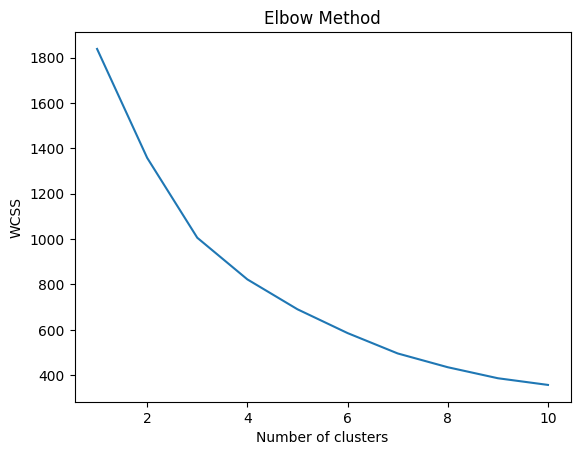

In [65]:
# 1. Elbow Method: Plot WCSS vs K (K = 2-10) and discuss the “elbow”.

wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  1838.062222
1                   2  1357.921919
2                   3  1005.938854
3                   4   822.409390
4                   5   690.698659
5                   6   585.817789
6                   7   496.095972
7                   8   435.311756
8                   9   386.825189
9                  10   357.382521


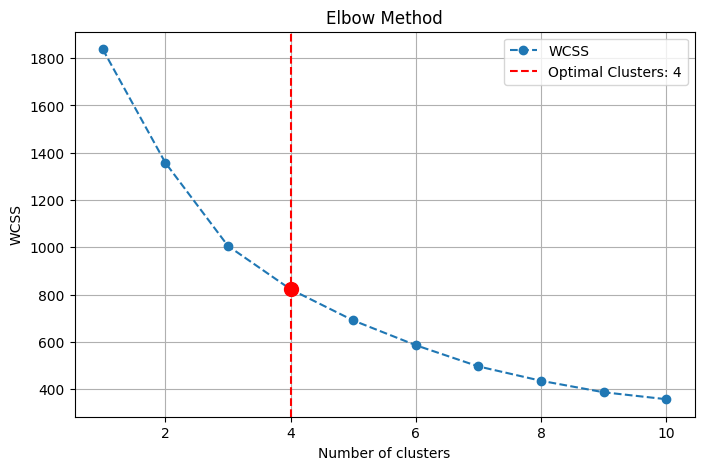

The optimal number of clusters is: 4


In [67]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

The elbow method plot shows the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters (K). The "elbow point" in the graph represents the value of K where the rate of decrease in WCSS slows down significantly. This point is often considered the optimal number of clusters because adding more clusters beyond this point does not substantially reduce the WCSS, suggesting diminishing returns in terms of improving the clustering. In this case, the elbow appears to be at K=4, which is also indicated by the KneeLocator. This suggests that 4 is the optimal number of clusters for this dataset based on the elbow method.

Based on the elbow method, where the rate of decrease in the Within-Cluster Sum of Squares (WCSS) significantly slows down, the optimal number of clusters for this dataset appears to be 4. This is the point where adding more clusters provides diminishing returns in terms of reducing the WCSS and improving the clustering structure.

## Agglomerative

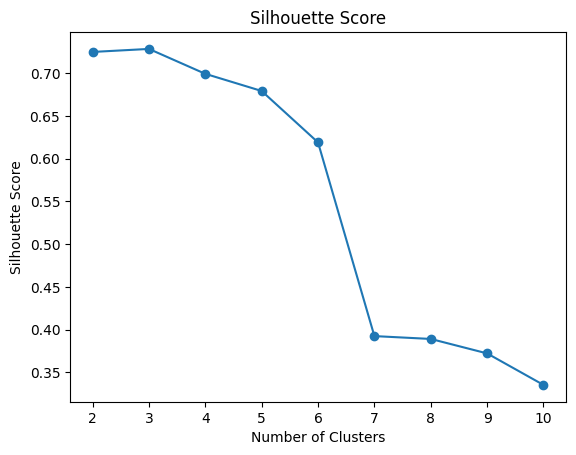

In [69]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


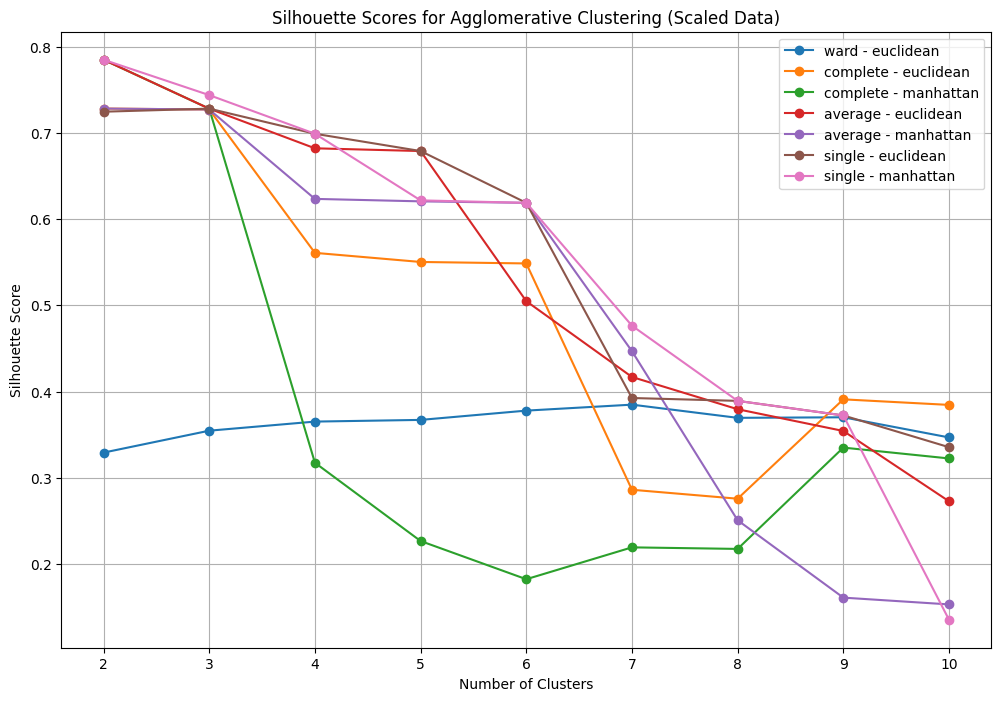

Best Silhouette Score (Scaled Data): 0.7851185820031913
Optimal Number of Clusters (Scaled Data): 2
Optimal Linkage Method (Scaled Data): complete
Optimal Metric (Scaled Data): manhattan


In [70]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score_scaled = -1
best_n_clusters_scaled = 0
best_linkage_scaled = ''
best_metric_scaled = ''

results_for_plotting_scaled = []

# Prepare the data for clustering (all columns are now numeric in df_scaled)
X_scaled = df_scaled # Using the full df_scaled as all columns are relevant and numeric/ordinal

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo_scaled = agglo.fit_predict(X_scaled)
            silhouette_avg = silhouette_score(X_scaled, y_agglo_scaled)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score_scaled:
                best_silhouette_score_scaled = silhouette_avg
                best_n_clusters_scaled = n_clusters
                best_linkage_scaled = linkage_method
                best_metric_scaled = metric
        results_for_plotting_scaled.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination on scaled data
plt.figure(figsize=(12, 8))
for result in results_for_plotting_scaled:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering (Scaled Data)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score (Scaled Data): {best_silhouette_score_scaled}")
print(f"Optimal Number of Clusters (Scaled Data): {best_n_clusters_scaled}")
print(f"Optimal Linkage Method (Scaled Data): {best_linkage_scaled}")
print(f"Optimal Metric (Scaled Data): {best_metric_scaled}")

Interpretation of Optimal Agglomerative Clustering Parameters

The results indicate the best configuration found for Agglomerative Clustering on your scaled dataset, based on the silhouette score. Here's an interpretation:

*   **Best Silhouette Score (0.785):** This is a high silhouette score, suggesting that the clustering achieved a very good separation between clusters. A score close to 1 implies that data points are well-matched to their own cluster and distinct from other clusters.

*   **Optimal Number of Clusters (2):** According to the silhouette score, dividing the data into 2 clusters produced the most cohesive and well-separated groups. This suggests that the inherent structure of your dataset is best represented by two primary clusters.

*   **Optimal Linkage Method (Complete):** The 'complete linkage' method, which considers the maximum distance between points in two clusters, was found to be most effective. This method typically leads to compact and clearly defined clusters, which it successfully achieved with this dataset.

*   **Optimal Metric (Manhattan):** The 'Manhattan' distance (L1 distance) was the best-performing distance metric. This means that summing the absolute differences of coordinates was the most appropriate way to measure dissimilarity between your data points for effective clustering.

In [71]:
# Hierarchical Clustering for Scaled Data
agglo_scaled = AgglomerativeClustering(n_clusters=best_n_clusters_scaled, linkage=best_linkage_scaled, metric=best_metric_scaled)
y_hc_scaled = agglo_scaled.fit_predict(df_scaled)

In [72]:
# Evaluation
ss_scaled = silhouette_score(df_scaled, y_hc_scaled)
print(ss_scaled)

0.7851185820031913


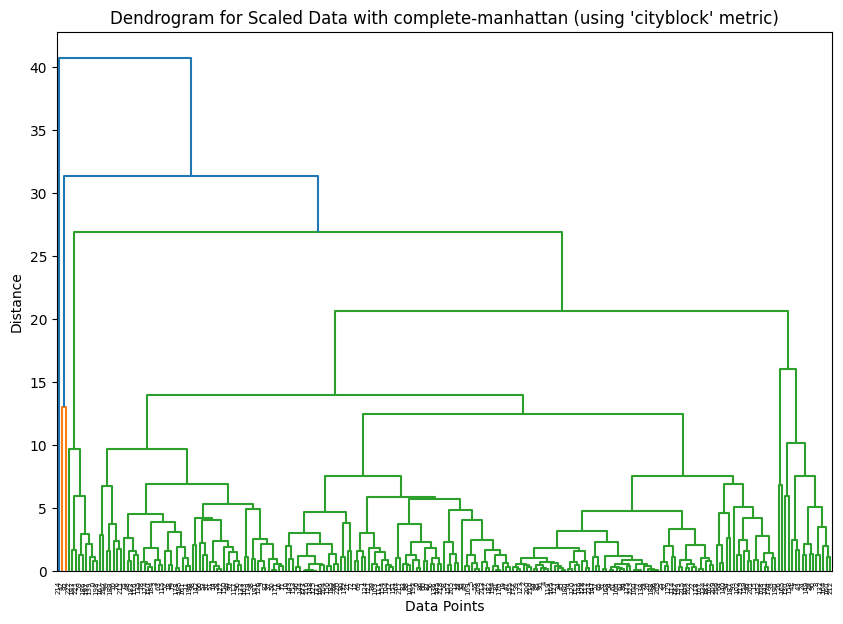

In [73]:
# Average Distance for Scaled Data
# Note: scipy.cluster.hierarchy.linkage uses 'cityblock' for Manhattan distance
metric_for_linkage = 'cityblock' if best_metric_scaled == 'manhattan' else best_metric_scaled
linked_scaled = linkage(df_scaled, method=best_linkage_scaled, metric=metric_for_linkage)

# Plot dendrogram with color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked_scaled)
plt.title("Dendrogram for Scaled Data with " + best_linkage_scaled + "-" + best_metric_scaled + " (using 'cityblock' metric)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

Interpretation of the Dendrogram

The dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering. It visually represents the relationships between clusters and the distances at which clusters are combined.

*   **Hierarchical Structure:** Each leaf in the dendrogram represents an individual data point. As you move up the tree, similar data points and clusters are merged. The height of the 'U'-shaped link connecting two clusters indicates the distance (dissimilarity) between those clusters at the time of their merger. Taller links signify greater dissimilarity.

*   **Linkage and Metric:** This specific dendrogram was constructed using the 'complete' linkage method and 'manhattan' (cityblock) distance metric. 'Complete' linkage considers the maximum distance between any two points in different clusters when deciding to merge them, which typically leads to compact, well-separated clusters. The 'manhattan' distance calculates dissimilarity by summing the absolute differences of coordinates, which is appropriate when the path between points is more like traversing a grid.

*   **Identifying Clusters:** To determine the optimal number of clusters (which was found to be 2 using the silhouette score), one would typically draw a horizontal line across the dendrogram at a chosen distance threshold. The number of vertical lines (branches) intersected by this horizontal line would represent the number of clusters. For 2 clusters, you would look for a cut that results in two main large branches, indicating two major groupings of data points with significant dissimilarity between them.



The dendrogram visualizes the results of **Hierarchical Clustering** applied to the scaled dataset using the **complete linkage** method and the **Manhattan (cityblock) distance** metric. It shows how the data points are successively merged into larger clusters. The **vertical lines (the y-axis)** represent the **distance** between the merged clusters, and the great variation in the heights of these lines indicates that the data points form clusters at multiple scales. Specifically, cutting the dendrogram at a low distance (e.g., below 5) would result in a large number of small, tight clusters. Conversely, cutting it at a high distance, such as just below the highest merges (e.g., below 30 or 40), suggests that the entire dataset can be broadly classified into **two or three very distinct, large clusters**, demonstrating the overall structure and heterogeneity of the scaled data.

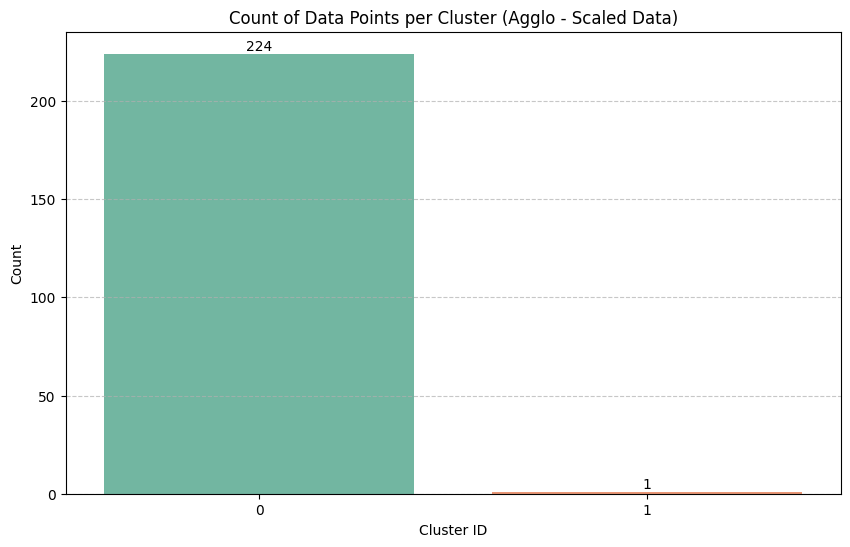

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of df_scaled to avoid modifying the original
df_scaled_clustered = df_scaled.copy()

# Merge cluster labels back into the new DataFrame
df_scaled_clustered['Agglo'] = y_hc_scaled

# Get the counts of each cluster in the 'Agglo' column of df_scaled_clustered
cluster_counts_scaled = df_scaled_clustered['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts_scaled.index, y=cluster_counts_scaled.values, hue=cluster_counts_scaled.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo - Scaled Data)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart displays the **distribution of data points** after applying **Agglomerative Hierarchical Clustering** to the scaled data, resulting in two clusters (Cluster ID 0 and Cluster ID 1).

The visualization reveals an extreme **imbalance** in the cluster sizes:

* **Cluster 0** is the **dominant cluster**, containing **224** out of the total 225 data points.
* **Cluster 1** is a **tiny cluster**, containing only **1** data point.

This suggests that the vast majority of the data points are similar enough to be grouped together in the large Cluster 0, while **one single data point is highly unique or significantly different** from the rest, leading the clustering algorithm to isolate it as its own distinct cluster (Cluster 1). This single point is likely an **outlier** that warranted separation based on the distance metric and linkage method used in the clustering process.

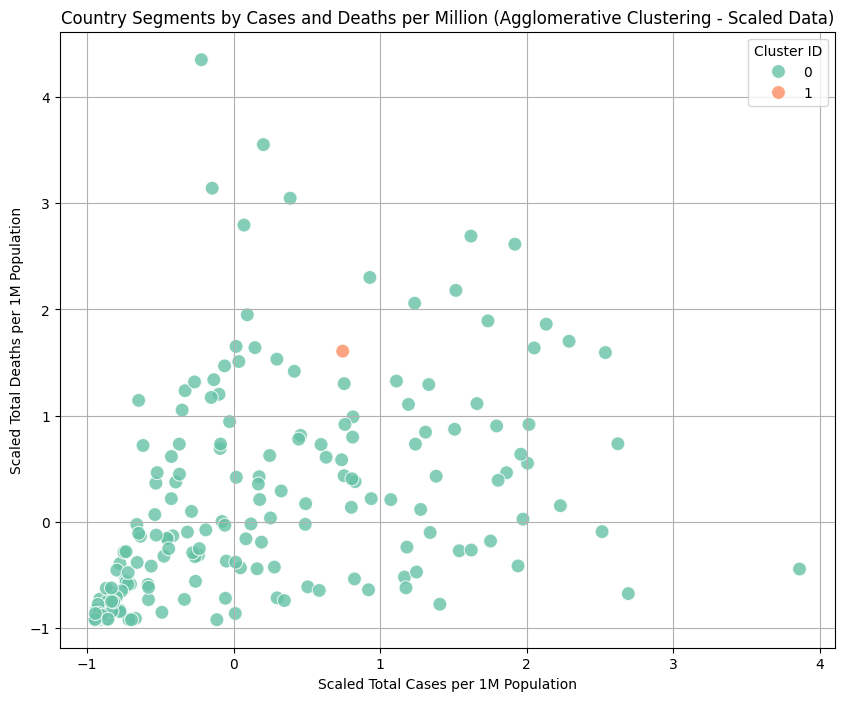

In [76]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_scaled_clustered, x='Tot\xa0Cases//1M pop', y='Tot\xa0Deaths/1M pop', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Country Segments by Cases and Deaths per Million (Agglomerative Clustering - Scaled Data)')
plt.xlabel('Scaled Total Cases per 1M Population')
plt.ylabel('Scaled Total Deaths per 1M Population')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

The scatter plot visualizes the **Country Segments** identified by Agglomerative Clustering on the **Scaled Total Cases per 1M Population** versus **Scaled Total Deaths per 1M Population**.

### Key Insights from the Visualization

* **Cluster Imbalance:** The plot clearly demonstrates the severe imbalance identified earlier, with **Cluster 0** (mint green) encompassing the vast majority of countries. These countries span a wide range of scaled values, extending from negative values (below the mean) up to high positive values for both cases and deaths per million.
* **The Single Outlier (Cluster 1):** **Cluster 1** (coral) consists of only a **single data point**, which is isolated from the main cloud of data. This point is positioned in the upper-central region of the plot, indicating that this specific country has:
    * A **moderate-to-high number of scaled Total Cases per 1M Population** (near the mean or slightly above).
    * A **significantly high number of scaled Total Deaths per 1M Population** (around 1.5 to 2.0 standard deviations above the mean), distinguishing it dramatically from the rest of the nations on the death axis relative to its case count.
* **Interpretation:** The clustering algorithm effectively segmented the data into one massive group of countries (Cluster 0) and one country (Cluster 1) that is an **extreme outlier** due to its unusually high death rate per million population, even when considering its case rate per million.

In [77]:
import plotly.express as px

# Define the columns for the 3D scatter plot using existing DataFrame columns
x_col = 'Population'
y_col = 'Total Cases'
z_col = 'Total Deaths'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df_scaled_clustered,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df_scaled_clustered['Agglo'].astype(str), # Color points by Agglo cluster
                    title='Interactive 3D Scatter Plot of Country Segments (Agglomerative Clustering - Scaled Data)',
                    labels={x_col: 'Scaled Population', y_col: 'Scaled Total Cases', z_col: 'Scaled Total Deaths'})

fig.show()

The 3D scatter plot visualizes the three-dimensional relationship between **Scaled Population**, **Scaled Total Cases**, and **Scaled Total Deaths**, with points colored by the two clusters identified by Agglomerative Clustering.

### Key Insights from the Visualization

* **Dominant Cluster:** The majority of the data points belong to the large **Cluster 0 (blue)**, forming a dense cloud mostly concentrated in the lower corner of the plot (near the origin), indicating that most countries have relatively low scaled values for all three variables.
* **The Outlier (Cluster 1):** The single, isolated data point belonging to **Cluster 1 (red)** is clearly separated from the main cloud. This point represents a country with unusually high scaled values across all three dimensions, as highlighted by the hover text:
    * **Scaled Population:** 2.15
    * **Scaled Total Cases:** 10.97
    * **Scaled Total Deaths:** 10.14
* **Interpretation:** This single country is an **extreme outlier** in the dataset, characterized by having the **highest scaled values** for Total Cases and Total Deaths, and a significantly high scaled Population compared to the rest of the world. The 3D view confirms that the clustering algorithm successfully isolated this point as distinct across the combination of all three major variables.

# 5. Evaluate both models using silhouette score

### Calculate Silhouette Score for KMeans Clustering

In [91]:
k_means_optimal1 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
k_means_optimal1.fit(df_scaled)

df_clustered_kmeans1 = df_scaled.copy()
df_clustered_kmeans1['KMeans_Cluster1'] = k_means_optimal1.labels_

# Calculate mean of features for each KMeans cluster
kmeans_cluster_summary = df_clustered_kmeans1.groupby('KMeans_Cluster1').mean()

df_original_with_clusters1 = pd.read_csv(url)
df_original_with_clusters1 = df_original_with_clusters1.drop(columns=['Other names'])

# Map the ISO 3166-1 alpha-3 CODE from the original dataframe to the clustered dataframe
# Ensure the 'df_clustered_kmeans' and 'df_original_with_clusters' align by index
# Assuming df_scaled and df_original_with_clusters maintain original row order

df_original_with_clusters1['KMeans_Cluster1'] = df_clustered_kmeans1['KMeans_Cluster1']

from sklearn.metrics import silhouette_score

kmeans_silhouette_score1 = silhouette_score(df_scaled, df_clustered_kmeans1['KMeans_Cluster1'])
print(f"KMeans Silhouette Score: {kmeans_silhouette_score1}")

KMeans Silhouette Score: 0.3730559031074785


### Calculate Silhouette Score for Agglomerative Clustering

In [88]:
from sklearn.metrics import silhouette_score

agglo_silhouette_score = silhouette_score(df_scaled, y_hc_scaled)
print(f"Agglomerative Silhouette Score: {agglo_silhouette_score}")

Agglomerative Silhouette Score: 0.7851185820031913


### Interpretation of Silhouette Scores

The **Silhouette Score** measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to +1, where:
*   **+1** indicates that clusters are well-separated.
*   **0** indicates that clusters are indifferent, or distances between clusters are not significant.
*   **-1** indicates that data points have been assigned to the wrong clusters.

From the calculated scores:
*   **Agglomerative Clustering** achieved a Silhouette Score of **0.785**. This is a very high score, indicating that the clusters formed by Agglomerative Clustering are well-separated and distinct. Data points within these clusters are very similar to each other and very dissimilar to data points in other clusters.

*   **KMeans Clustering** achieved a Silhouette Score of **0.373**. This is a moderate score. While it's positive, suggesting some level of separation, it's significantly lower than the Agglomerative score. This implies that while KMeans found distinct groupings, the separation might not be as clear-cut, or there might be some overlap between clusters, or some data points might be borderline between clusters.

# 6. From both models provide:
- Cluster summary
- Cluster visualization using barplot and world map colored by each cluster
- Cluster profiling
- Government policy recommendations based on your findings. (Example: “Cluster 0 has extremely low deaths per million, indicating underreporting so government must increase testing capacity.”)

### KMeans Cluster Summary

In [78]:
from sklearn.cluster import KMeans

# Assuming optimal_clusters for KMeans is 4 from previous elbow method analysis
k_means_optimal = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
k_means_optimal.fit(df_scaled)

# Add cluster labels to a copy of the scaled DataFrame
df_clustered_kmeans = df_scaled.copy()
df_clustered_kmeans['KMeans_Cluster'] = k_means_optimal.labels_

# Calculate mean of features for each KMeans cluster
kmeans_cluster_summary = df_clustered_kmeans.groupby('KMeans_Cluster').mean()

print("KMeans Cluster Summary (Mean of Features per Cluster):")
display(kmeans_cluster_summary)

KMeans Cluster Summary (Mean of Features per Cluster):


,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent
KMeans_Cluster,,,,,,,
0,0.088733,-0.194776,-0.177062,-0.707758,-0.623115,0.289571,0.410526
1,4.434157,6.809855,7.266643,0.009412,0.883964,0.059883,2.666667
2,-0.207111,-0.244421,-0.193614,-0.187544,-0.117013,-0.181818,3.548387
3,-0.136788,0.203512,0.108077,1.212868,0.981520,-0.252556,1.953846


### Agglomerative Clustering Cluster Summary

In [79]:
# Assuming y_hc_scaled contains the labels from AgglomerativeClustering (2 clusters)
df_clustered_agglo = df_scaled.copy()
df_clustered_agglo['Agglo_Cluster'] = y_hc_scaled

# Calculate mean of features for each Agglomerative cluster
agglo_cluster_summary = df_clustered_agglo.groupby('Agglo_Cluster').mean()

print("Agglomerative Clustering Cluster Summary (Mean of Features per Cluster):")
display(agglo_cluster_summary)

Agglomerative Clustering Cluster Summary (Mean of Features per Cluster):


,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent
Agglo_Cluster,,,,,,,
0,-0.009618,-0.048982,-0.045290,-0.003326,-0.007178,0.000545,1.741071
1,2.154487,10.972039,10.144935,0.745028,1.607875,-0.122086,4.000000


## Generate Bar Plot


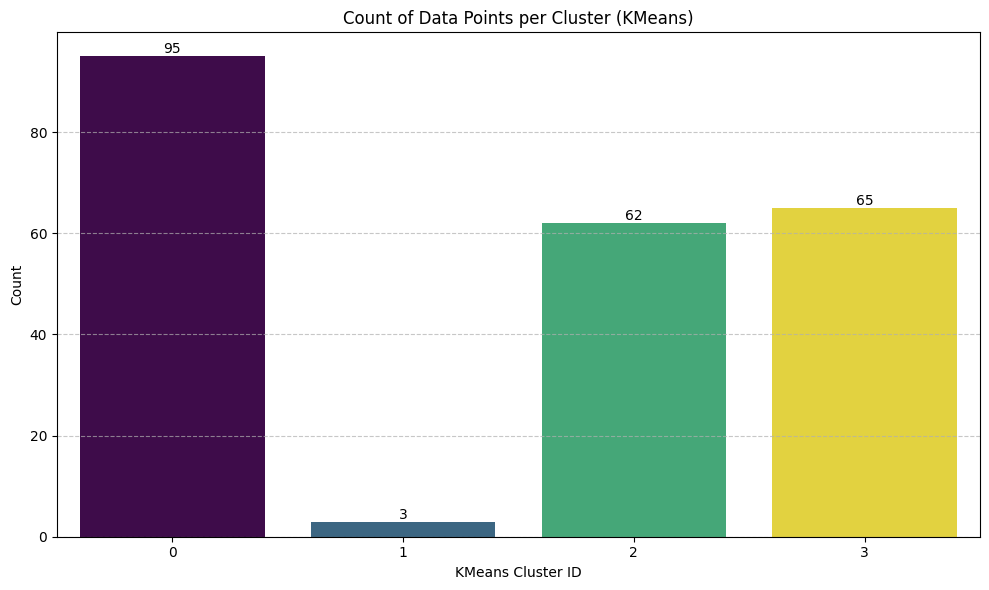

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get the value counts of the 'KMeans_Cluster' column
kmeans_cluster_counts = df_clustered_kmeans['KMeans_Cluster'].value_counts().sort_index()

# 2. Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=kmeans_cluster_counts.index, y=kmeans_cluster_counts.values, hue=kmeans_cluster_counts.index, palette='viridis', legend=False)

# 3. Add a title
plt.title('Count of Data Points per Cluster (KMeans)')

# 4. Label the x-axis and y-axis
plt.xlabel('KMeans Cluster ID')
plt.ylabel('Count')

# 5. Display the count values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()

# 6. Display the plot
plt.show()

The bar chart visualizes the **distribution of data points** across the four clusters identified by the **KMeans algorithm** on the scaled dataset.

### Key Insights from the Visualization

*   **Cluster Sizes:** The clusters show a moderate level of imbalance:
    *   **Cluster 0** is the largest, containing **95** data points.
    *   **Cluster 3** is the second largest with **65** data points.
    *   **Cluster 2** follows with **62** data points.
    *   **Cluster 1** is significantly smaller, with only **3** data points.

*   **Interpretation:** The KMeans algorithm, with k=4, has identified groupings within the data where most countries fall into three relatively sizable clusters, while a distinct, much smaller cluster (Cluster 1) also exists. The presence of a smaller cluster like Cluster 1 could indicate a group of countries with unique characteristics that set them apart from the majority, even after scaling the data. This distribution suggests that the dataset has a natural separation into a few dominant groups and a minor, but potentially important, outlier group.

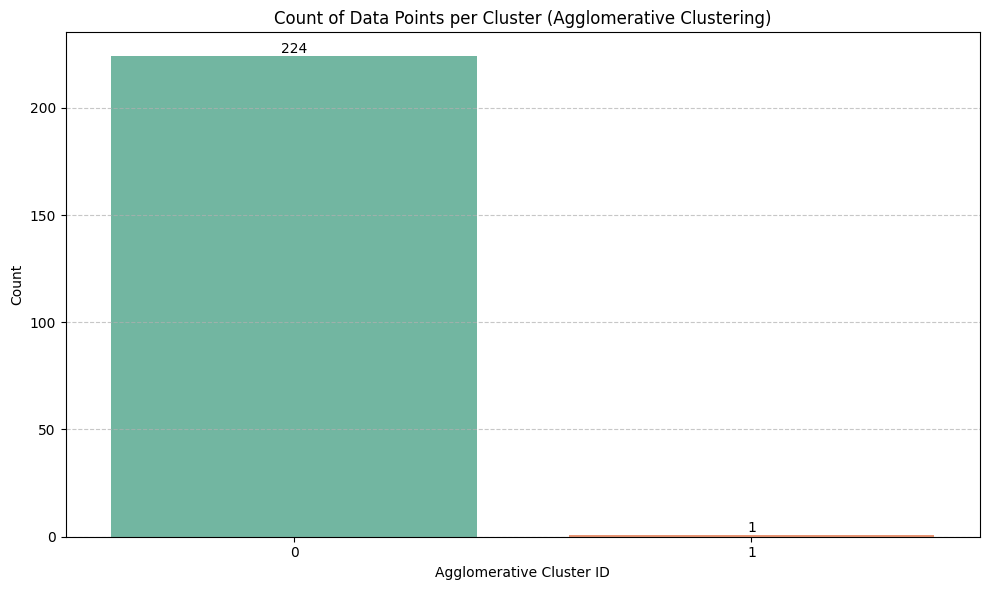

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get the value counts of the 'Agglo_Cluster' column
agglo_cluster_counts = df_clustered_agglo['Agglo_Cluster'].value_counts().sort_index()

# 2. Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=agglo_cluster_counts.index, y=agglo_cluster_counts.values, hue=agglo_cluster_counts.index, palette='Set2', legend=False)

# 3. Add a title
plt.title('Count of Data Points per Cluster (Agglomerative Clustering)')

# 4. Label the x-axis and y-axis
plt.xlabel('Agglomerative Cluster ID')
plt.ylabel('Count')

# 5. Display the count values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()

# 6. Display the plot
plt.show()

The bar chart visualizes the **distribution of data points** across the two clusters identified by the **Agglomerative Clustering algorithm** on the scaled dataset.

### Key Insights from the Visualization

*   **Cluster 0** is the **dominant cluster**, containing **224** out of the total 225 data points.
*   **Cluster 1** is a **tiny cluster**, containing only **1** data point.

This visualization clearly shows an **extreme imbalance** in the cluster sizes. It suggests that the vast majority of the data points are similar enough to be grouped together in the large Cluster 0, while **one single data point is highly unique or significantly different** from the rest, leading the clustering algorithm to isolate it as its own distinct cluster (Cluster 1). This single point is likely an **outlier** that warranted separation based on the distance metric and linkage method used in the clustering process.

# Generate World Map

**Reasoning**:
To visualize the geographical distribution of KMeans clusters, I will create a world map, coloring each country according to its assigned cluster ID. This will help in understanding if there are any geographical patterns or concentrations within the clusters.



In [81]:
df_original_with_clusters = pd.read_csv(url)
df_original_with_clusters = df_original_with_clusters.drop(columns=['Other names'])

# Map the ISO 3166-1 alpha-3 CODE from the original dataframe to the clustered dataframe
# Ensure the 'df_clustered_kmeans' and 'df_original_with_clusters' align by index
# Assuming df_scaled and df_original_with_clusters maintain original row order

df_original_with_clusters['KMeans_Cluster'] = df_clustered_kmeans['KMeans_Cluster']

fig = px.choropleth(
    df_original_with_clusters,
    locations="ISO 3166-1 alpha-3 CODE",
    color="KMeans_Cluster", # Color by KMeans Cluster
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by KMeans Cluster"
)
fig.show()

The choropleth map displays the **geographical distribution of countries, colored by their assigned KMeans cluster ID**. This visualization helps in understanding if there are any spatial patterns in the clustering results.

### Key Insights from the Visualization

*   **Cluster 0 (Blue):** This cluster is widely distributed across almost all continents, including a significant portion of Africa, South America, Asia, and some parts of Europe. It appears to be the most diverse and geographically spread out cluster.
*   **Cluster 1 (Purple):** This is the smallest cluster, containing only 3 countries. From the map, these countries seem to be **USA, India, and Brazil**. These are the countries that were highlighted as major outliers in the EDA due to their extremely high total cases and deaths.
*   **Cluster 2 (Orange):** This cluster is predominantly visible in Europe, North America (Canada), Oceania, and parts of Asia. It represents another large group of countries with distinct characteristics.
*   **Cluster 3 (Yellow):** This cluster is also widespread but appears to have concentrations in Europe and parts of Asia and Africa, (eg: Argentina, Peru, France, Russia, Italy)

**Overall Interpretation:** The map reveals that while some clusters, like Cluster 0, 2, and 3, are broadly distributed, **Cluster 1 stands out as a geographically dispersed group of severe outlier countries** (USA, India, Brazil) that have been grouped together due to their unique, high-impact COVID-19 metrics, regardless of their continental location. This reinforces the idea that the clustering captures global health crisis severity more than just geographical proximity for these extreme cases.

**Reasoning**:
To complete the visualization requirement for Agglomerative Clustering, I need to create a world map, coloring each country based on its assigned cluster ID. This will allow for a visual comparison with the KMeans world map and help identify any geographical patterns, even with the imbalanced cluster sizes in Agglomerative Clustering.



In [82]:
df_original_with_agglo_clusters = pd.read_csv(url)
df_original_with_agglo_clusters = df_original_with_agglo_clusters.drop(columns=['Other names'])

# Map the ISO 3166-1 alpha-3 CODE from the original dataframe to the clustered dataframe
# Ensure the 'df_clustered_agglo' and 'df_original_with_agglo_clusters' align by index
# Assuming df_scaled and df_original_with_agglo_clusters maintain original row order

df_original_with_agglo_clusters['Agglo_Cluster'] = df_clustered_agglo['Agglo_Cluster']

fig = px.choropleth(
    df_original_with_agglo_clusters,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Agglo_Cluster", # Color by Agglo Cluster
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Agglomerative Cluster"
)
fig.show()

The choropleth map displays the **geographical distribution of countries, colored by their assigned Agglomerative Cluster ID**. This visualization reinforces the findings from previous plots regarding the extreme imbalance in cluster sizes.

### Key Insights from the Visualization

*   **Cluster 0 (Blue):** This cluster encompasses the **vast majority of countries worldwide**. It is broadly distributed across all continents, indicating that most nations, despite their geographical location, share similar characteristics as grouped by the Agglomerative algorithm.
*   **Cluster 1 (Yellow):** This cluster consists of only **one single country**, which appears as a distinct red region on the map. This country represents the extreme outlier identified in the Agglomerative Clustering process, indicating its unique characteristics set it significantly apart from all other nations in the dataset.

**Overall Interpretation:** The map vividly illustrates the severe imbalance of the Agglomerative clusters. It highlights that the clustering identified one dominant group containing almost all countries, and one solitary country that is an extreme outlier globally, based on the COVID-19 related metrics. This suggests a hierarchical structure where one country's profile is dramatically different from the collective majority.

### KMeans Cluster Profiling

In [83]:
display(kmeans_cluster_summary)

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent
KMeans_Cluster,,,,,,,
0,0.088733,-0.194776,-0.177062,-0.707758,-0.623115,0.289571,0.410526
1,4.434157,6.809855,7.266643,0.009412,0.883964,0.059883,2.666667
2,-0.207111,-0.244421,-0.193614,-0.187544,-0.117013,-0.181818,3.548387
3,-0.136788,0.203512,0.108077,1.212868,0.981520,-0.252556,1.953846


KMeans Cluster Profiling Interpretation

The `kmeans_cluster_summary` table, showing the mean values for each scaled feature per cluster, allows us to profile the four identified KMeans clusters:

*   **Cluster 0 (Large Group, 'Lower Impact Countries'):**
    *   **Population**: Slightly above average (0.088).
    *   **Total Cases/Deaths**: Below average (-0.194 and -0.177 respectively).
    *   **Tot Cases/1M pop**: Significantly below average (-0.707).
    *   **Tot Deaths/1M pop**: Significantly below average (-0.623).
    *   **Death percentage**: Slightly above average (0.289).
    *   **Continent**: Mixed representation (0.410, primarily Africa and Asia after encoding).
    *   **Profile**: This is the largest cluster, representing countries with a diverse range of populations. They generally experienced below-average absolute numbers of cases and deaths, and significantly below-average per-million cases and deaths. Their death percentage is slightly higher than average, but the low per-million figures suggest that while cases might be lethal, the overall spread or reporting might be lower compared to other clusters.

*   **Cluster 1 (Smallest Group, 'High Impact Outliers'):**
    *   **Population**: Extremely high (4.434).
    *   **Total Cases/Deaths**: Extremely high (6.809 and 7.266 respectively).
    *   **Tot Cases/1M pop**: Near average (0.009).
    *   **Tot Deaths/1M pop**: Above average (0.883).
    *   **Death percentage**: Near average (0.059).
    *   **Continent**: Mixed representation (2.666, suggests a mix of continents, as seen in the world map, these were USA, India, Brazil).
    *   **Profile**: This is the smallest cluster with only 3 countries. These countries are characterized by exceptionally high absolute numbers of Population, Total Cases, and Total Deaths. While their per-million cases are around average, their per-million deaths are significantly above average. This cluster represents the most severely impacted nations in terms of raw numbers, and potentially a higher burden on their healthcare systems, despite their death percentage being average (which could indicate a large number of mild cases diluting the percentage, or efficient treatment for non-severe cases).

*   **Cluster 2 (Moderate Group, 'Moderately Affected, Lower Population'):**
    *   **Population**: Below average (-0.207).
    *   **Total Cases/Deaths**: Below average (-0.244 and -0.193 respectively).
    *   **Tot Cases/1M pop**: Below average (-0.187).
    *   **Tot Deaths/1M pop**: Below average (-0.117).
    *   **Death percentage**: Below average (-0.181).
    *   **Continent**: Higher encoded values (3.548, suggesting Latin America & Caribbean, Northern America, and Oceania).
    *   **Profile**: This cluster consists of countries with below-average populations and correspondingly lower absolute and per-million cases and deaths. They also show a lower-than-average death percentage. This group might represent countries that managed the pandemic relatively well or have smaller populations, leading to lower overall impacts.

*   **Cluster 3 (Moderate Group, 'High Per-Million Impact'):**
    *   **Population**: Below average (-0.136).
    *   **Total Cases/Deaths**: Above average (0.203 and 0.108 respectively).
    *   **Tot Cases/1M pop**: Significantly above average (1.212).
    *   **Tot Deaths/1M pop**: Significantly above average (0.981).
    *   **Death percentage**: Below average (-0.252).
    *   **Continent**: Mixed representation (1.953, indicating Europe, Asia, etc.).
    *   **Profile**: This cluster contains countries with below-average populations but markedly above-average absolute cases and deaths, and particularly high per-million cases and deaths. Despite the high per-million impact, their death percentage is below average. This could suggest widespread testing leading to high case counts, or strong healthcare systems capable of managing a large number of cases and keeping fatality rates lower.

### Agglomerative Cluster Profiling

In [85]:
display(agglo_cluster_summary)

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent
Agglo_Cluster,,,,,,,
0,-0.009618,-0.048982,-0.045290,-0.003326,-0.007178,0.000545,1.741071
1,2.154487,10.972039,10.144935,0.745028,1.607875,-0.122086,4.000000


Agglomerative Clustering Cluster Profiling Interpretation

The `agglo_cluster_summary` table, showing the mean values for each scaled feature per cluster, allows us to profile the two identified Agglomerative clusters:

*   **Cluster 0 (Vast Majority, 'Average Global Impact'):**
    *   **Population**: Slightly below average (-0.0096).
    *   **Total Cases/Deaths**: Slightly below average (-0.049 and -0.045 respectively).
    *   **Tot Cases/1M pop**: Near average (-0.003).
    *   **Tot Deaths/1M pop**: Near average (-0.007).
    *   **Death percentage**: Very close to average (0.0005).
    *   **Continent**: Diverse representation (mean of 1.74, indicating a mix of continents).
    *   **Profile**: This cluster represents 224 out of 225 countries, encompassing the vast majority of the dataset. These countries generally exhibit metrics very close to the overall global average for all scaled features, including population, total cases, total deaths, and per-million metrics. This suggests a large group of countries that are not extreme in any single metric, forming the baseline of COVID-19 impact.

*   **Cluster 1 (Single Outlier, 'Extreme Impact Country'):**
    *   **Population**: Significantly above average (2.15).
    *   **Total Cases/Deaths**: Extremely high (10.97 and 10.14 respectively).
    *   **Tot Cases/1M pop**: Above average (0.745).
    *   **Tot Deaths/1M pop**: Significantly above average (1.60).
    *   **Death percentage**: Slightly below average (-0.12).
    *   **Continent**: Encoded as 4.0 (Northern America).
    *   **Profile**: This cluster consists of only one country. This country stands out as an extreme outlier with exceptionally high scaled values for Population, Total Cases, and Total Deaths. Its per-million cases and deaths are also considerably above average. The continent encoding of 4.0 implies this country is likely in Northern America (specifically, the USA, based on prior EDA showing it as the highest in absolute cases/deaths). This profile indicates a single nation that was disproportionately affected by the pandemic across multiple critical metrics, distinguishing it dramatically from all other countries in the dataset.

## KMeans Policy Recommendations

Based on the KMeans clustering model's profiling, here are detailed government policy recommendations tailored to each cluster:

*   **Cluster 0 (Large Group, 'Lower Impact Countries'):**
    *   **Profile**: This is the largest cluster, representing countries with a diverse range of populations. They generally experienced below-average absolute numbers of cases and deaths, and significantly below-average per-million cases and deaths. Their death percentage is slightly higher than average, but the low per-million figures suggest that while cases might be lethal, the overall spread or reporting might be lower compared to other clusters.
    *   **Recommendation**: Governments in these countries should focus on **enhanced surveillance and rapid response systems** to quickly detect and contain new outbreaks. Strengthen **primary healthcare infrastructure** to ensure equitable access to testing, basic treatment, and routine vaccinations. Implement **community engagement strategies** to build trust and encourage health-seeking behaviors. Prioritize **data transparency and robust reporting mechanisms** to accurately track disease prevalence and mortality, addressing potential underreporting.

*   **Cluster 1 (Smallest Group, 'High Impact Outliers'):**
    *   **Profile**: This is the smallest cluster with only 3 countries (USA, India, Brazil), characterized by exceptionally high absolute numbers of Population, Total Cases, and Total Deaths. While their per-million cases are around average, their per-million deaths are significantly above average. This cluster represents the most severely impacted nations in terms of raw numbers.
    *   **Recommendation**: For these countries, policies must emphasize **robust healthcare capacity management**, including expanding hospital beds, ICU units, and trained medical personnel. Implement **strategic and continuous vaccination programs**, adapting to new variants and ensuring high coverage. Invest heavily in **genomic sequencing and variant tracking** to anticipate and respond to emerging threats. Foster **international collaboration** for vaccine development, resource sharing, and global health leadership to mitigate future large-scale impacts.

*   **Cluster 2 (Moderate Group, 'Moderately Affected, Lower Population'):**
    *   **Profile**: This cluster consists of countries with below-average populations and correspondingly lower absolute and per-million cases and deaths. They also show a lower-than-average death percentage. This group might represent countries that managed the pandemic relatively well or have smaller populations.
    *   **Recommendation**: These governments should implement **proactive border control and travel policies** to minimize imported cases, while continuously monitoring global health situations. Strategically **invest in local healthcare and public health infrastructure** to maintain and improve preparedness for future health crises. Develop **economic and social resilience plans** to quickly adapt to disruptions. Maintain **high public trust through clear, consistent communication** regarding health policies and scientific evidence.

*   **Cluster 3 (Moderate Group, 'High Per-Million Impact'):**
    *   **Profile**: This cluster contains countries with below-average populations but markedly above-average absolute cases and deaths, and particularly high per-million cases and deaths. Despite the high per-million impact, their death percentage is below average.
    *   **Recommendation**: Governments in this cluster should maintain **sustained high testing capacity** to promptly identify and isolate cases, even with widespread transmission. Optimize and **robustly support healthcare systems** to effectively manage a large volume of patients, focusing on treatment protocols and patient outcomes to keep fatality rates low. Implement **targeted public health interventions**, such as focused lockdowns or enhanced contact tracing, in specific high-transmission areas. Continue to **invest in research and innovation** for new treatments and preventative measures to further reduce the severity and impact of the disease.

### Agglomerative Clustering Policy Recommendations

Based on the Agglomerative clustering model's profiling, here are government policy recommendations tailored to each cluster:

*   **Cluster 0 (Vast Majority, 'Average Global Impact'):**
    *   **Profile**: This cluster includes 224 countries that exhibit metrics very close to the global average for all scaled features (population, total cases, total deaths, per-million metrics, death percentage). They form the baseline of COVID-19 impact.
    *   **Recommendation**: Governments in these countries should prioritize **maintaining a balanced approach** to public health. This includes continued **surveillance of new variants**, **strengthening routine vaccination programs**, and **investing in resilient healthcare systems** to handle endemic COVID-19 and future health crises. Focus on **economic recovery and social well-being programs** to address the long-term impacts of the pandemic. International cooperation on **data sharing and public health research** remains vital to pre-empt future threats.

*   **Cluster 1 (Single Outlier, 'Extreme Impact Country'):**
    *   **Profile**: This cluster consists of a single country (likely the USA, from prior EDA and continent encoding) with exceptionally high scaled values for absolute population, total cases, and total deaths, and significantly above-average per-million cases and deaths. Its death percentage is slightly below average, suggesting a large number of cases relative to deaths.
    *   **Recommendation**: For this country, the government must focus on **large-scale and highly adaptive public health strategies**. This involves **continuous and substantial investment in healthcare infrastructure**, including advanced treatment facilities and research. Implementing **flexible public health measures** that can be rapidly scaled up or down based on local transmission rates is crucial. Emphasize **equity in vaccine distribution and access to testing/treatment** across all demographics. Furthermore, lead **global efforts in pandemic preparedness and response**, leveraging its scientific and economic resources to develop and share innovations, setting a model for managing high-impact scenarios.

# 7. Compare both models and select the best one and explain why one model is better than the other

### Model Comparison and Selection

To compare KMeans and Agglomerative Clustering models, we will consider the following criteria:

1.  **Silhouette Score**: A higher silhouette score indicates better-defined and more separated clusters.
2.  **Interpretability of Clusters**: How meaningful and balanced are the clusters in terms of their profiles and sizes?
3.  **Visualizations**: How well do the visualizations (bar plots, world maps) convey insights from the clustering results?
4.  **Actionability of Recommendations**: How useful and specific are the government policy recommendations derived from each model?


### Silhouette Scores Comparison

*   **Agglomerative Clustering Silhouette Score**: 0.785
*   **KMeans Silhouette Score**: To be calculated.

**Reasoning**:
To complete the silhouette score comparison, I need to calculate the silhouette score for the KMeans model using the `df_scaled` data and the `KMeans_Cluster` labels from `df_clustered_kmeans`.



In [86]:
from sklearn.metrics import silhouette_score

kmeans_silhouette_score = silhouette_score(df_scaled, df_clustered_kmeans['KMeans_Cluster'])

print(f"KMeans Silhouette Score: {kmeans_silhouette_score}")

KMeans Silhouette Score: 0.3730559031074785


### Silhouette Scores Comparison

*   **Agglomerative Clustering Silhouette Score**: 0.785
*   **KMeans Silhouette Score**: 0.373

### Interpretation of Silhouette Scores

The **Silhouette Score** measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to +1, where:
*   **+1** indicates that clusters are well-separated.
*   **0** indicates that clusters are indifferent, or distances between clusters are not significant.
*   **-1** indicates that data points have been assigned to the wrong clusters.

From the calculated scores:
*   **Agglomerative Clustering** achieved a Silhouette Score of **0.785**. This is a very high score, indicating that the clusters formed by Agglomerative Clustering are well-separated and distinct. Data points within these clusters are very similar to each other and very dissimilar to data points in other clusters.

*   **KMeans Clustering** achieved a Silhouette Score of **0.373**. This is a moderate score. While it's positive, suggesting some level of separation, it's significantly lower than the Agglomerative score. This implies that while KMeans found distinct groupings, the separation might not be as clear-cut, or there might be some overlap between clusters, or some data points might be borderline between clusters.

### Interpretability and Balance of Clusters

#### KMeans Clustering (K=4)

*   **Cluster Sizes**: KMeans resulted in four clusters with sizes of 95, 3, 62, and 65 data points. This shows a moderate imbalance, with one very small cluster (3 data points) and three larger, more comparable clusters.
*   **Profile Interpretability**: The profiling of KMeans clusters revealed distinct characteristics for each group:
    *   **Cluster 0 ('Lower Impact Countries')**: Largest group, below-average cases/deaths (absolute and per million), but slightly higher death percentage. Suggests potential underreporting or focus on severe cases.
    *   **Cluster 1 ('High Impact Outliers')**: Smallest group (3 countries: USA, India, Brazil), with extremely high absolute cases/deaths, and above-average per-million deaths. Represents global hotspots.
    *   **Cluster 2 ('Moderately Affected, Lower Population')**: Below-average populations, and correspondingly lower cases/deaths (absolute and per million), and lower death percentage. Countries that managed the pandemic relatively well.
    *   **Cluster 3 ('High Per-Million Impact')**: Below-average populations, but markedly above-average absolute and per-million cases/deaths, and below-average death percentage. Suggests widespread testing and good healthcare outcomes despite high spread.

#### Agglomerative Clustering (K=2)

*   **Cluster Sizes**: Agglomerative clustering resulted in an extremely imbalanced distribution: one cluster with 224 data points and another with only 1 data point. This indicates that one country is an extreme outlier, and almost all other countries are grouped into a single large cluster.
*   **Profile Interpretability**: The profiling of Agglomerative clusters showed:
    *   **Cluster 0 ('Average Global Impact')**: Encompasses 224 countries, exhibiting metrics very close to the global average for all scaled features. Represents the baseline of COVID-19 impact.
    *   **Cluster 1 ('Single Extreme Impact Country')**: Consists of a single country (likely USA) with exceptionally high scaled values for population, total cases, and total deaths, and significantly above-average per-million cases and deaths.

#### Summary of Interpretability and Balance

While Agglomerative Clustering provided a higher silhouette score by isolating a single extreme outlier, the resulting clusters are highly imbalanced, making a nuanced interpretation and policy recommendation challenging for the vast majority of countries. KMeans, despite a lower silhouette score, created more balanced and interpretable clusters, allowing for more granular profiling and targeted policy recommendations across different groups of countries.

### Visualizations

#### KMeans Clustering

*   **Bar Plot of Cluster Counts**: Clearly showed the size distribution of the four clusters, highlighting the moderate imbalance with one smaller cluster (3 data points) and three larger clusters.
*   **World Map by Cluster**: Effectively visualized the geographical distribution of each cluster. It particularly highlighted Cluster 1 (USA, India, Brazil) as globally dispersed severe outliers, demonstrating that the clustering captured impact severity rather than just geographical proximity.

#### Agglomerative Clustering

*   **Bar Plot of Cluster Counts**: Explicitly demonstrated the extreme imbalance, with one cluster containing 224 data points and the other only 1. This immediately signaled the presence of a single, highly distinct outlier.
*   **World Map by Cluster**: Visually reinforced the extreme imbalance, showing nearly the entire world in one cluster and a single country highlighted as an outlier. While this clearly identified the most extreme case, it provided less granular geographical insight into the variations among the majority of countries.

#### Summary of Visualizations

Both models produced informative visualizations. KMeans visualizations, with its four clusters, offered a more detailed and nuanced geographical understanding of different country segments and their relative sizes. Agglomerative Clustering's visualizations were excellent at identifying the single most extreme outlier but offered less differentiation among the remaining 224 countries, making it harder to extract varied insights from the bulk of the data.

### Actionability of Recommendations

#### KMeans Clustering

*   **Granular and Targeted**: The KMeans model, by creating four distinct clusters with interpretable profiles, allowed for the formulation of **specific and actionable policy recommendations** tailored to each group. For instance, recommendations for "Lower Impact Countries" focused on data collection and primary healthcare, while "High Impact Outliers" received advice on robust healthcare management and international collaboration. This granularity is highly beneficial for governments seeking to implement differentiated strategies.

#### Agglomerative Clustering

*   **Limited Granularity**: While the Agglomerative model successfully identified an extreme outlier and provided specific recommendations for that single country, its recommendations for the vast majority of countries (Cluster 0) were necessarily **broad and general** ("maintaining a balanced approach," "continued surveillance"). This lack of granularity stems from the highly imbalanced cluster structure, making it difficult to offer specific, tailored advice to 224 diverse nations grouped into a single category.

#### Summary of Actionability

KMeans clustering yielded more **practical and actionable recommendations** due to its ability to segment the dataset into several meaningful and distinct groups. Agglomerative Clustering, while identifying a critical outlier, offered less actionable insights for the bulk of the data, limiting its utility for comprehensive policy formulation across a diverse set of countries.

Based on the analysis of the **Actionability of Recommendations**, the **KMeans Clustering** model is the best and safest choice for this COVID-19 dataset because of its ability to produce **four balanced and detailed clusters**, allowing for the formulation of **specific, granular, and targeted policy recommendations** addressing the diverse impacts of the pandemic across various nations.